<a href="https://colab.research.google.com/github/Hari02sha26/ML_Projects/blob/main/Implementing_Simple_Linear_Regression_Model_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  import numpy as np

In [15]:
class Linear_Regression():
  def __init__(self, no_of_iterations, learning_rate):
    self.no_of_iterations = no_of_iterations
    self.learning_rate = learning_rate

  def fit(self,x,y):
    self.m , self.n = x.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_predict = self.predict(self.x)
    dw = -(2 * (self.x.T).dot(self.y - y_predict)) / self.m
    dc = -2*np.sum(self.y - y_predict) / self.m
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * dc

  def predict(self,x):
    return x.dot(self.w) + self.b


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
salary_data = pd.read_csv('/content/salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [19]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [20]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [21]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

In [105]:
model = Linear_Regression(no_of_iterations=500,learning_rate=0.02)

In [106]:
model.fit(x_train,y_train)

In [107]:
print('Weight --> ',model.w[0])
print('Bias --> ',model.b)

Weight -->  9579.809759588334
Bias -->  23229.90197763845


In [108]:
test_data_predict = model.predict(x_test)

In [109]:
print(test_data_predict)

[ 35683.6546651   33767.69271319  66339.04589579  58675.19808812
  91246.55127072  80708.76053517 101784.34200626  51969.3312564
  42389.52149682  88372.60834284]


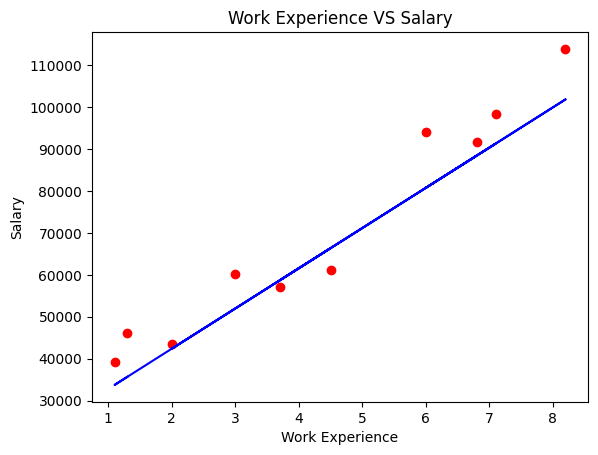

In [110]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_predict,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Work Experience VS Salary')
plt.show()